  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  
Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit

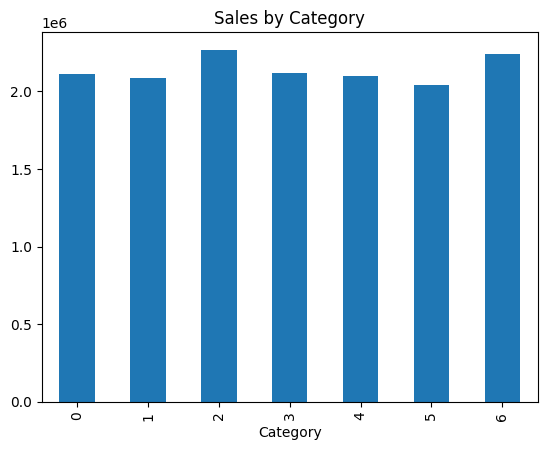

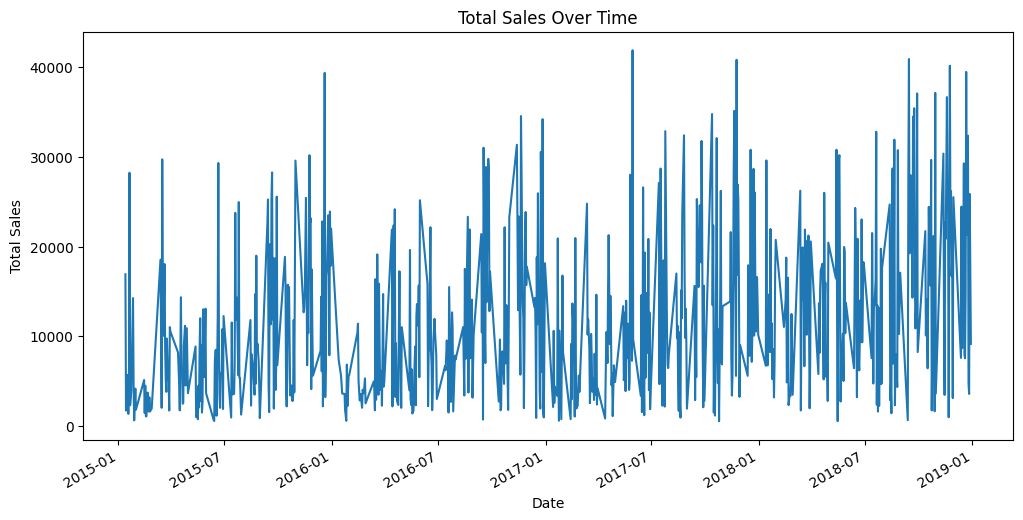

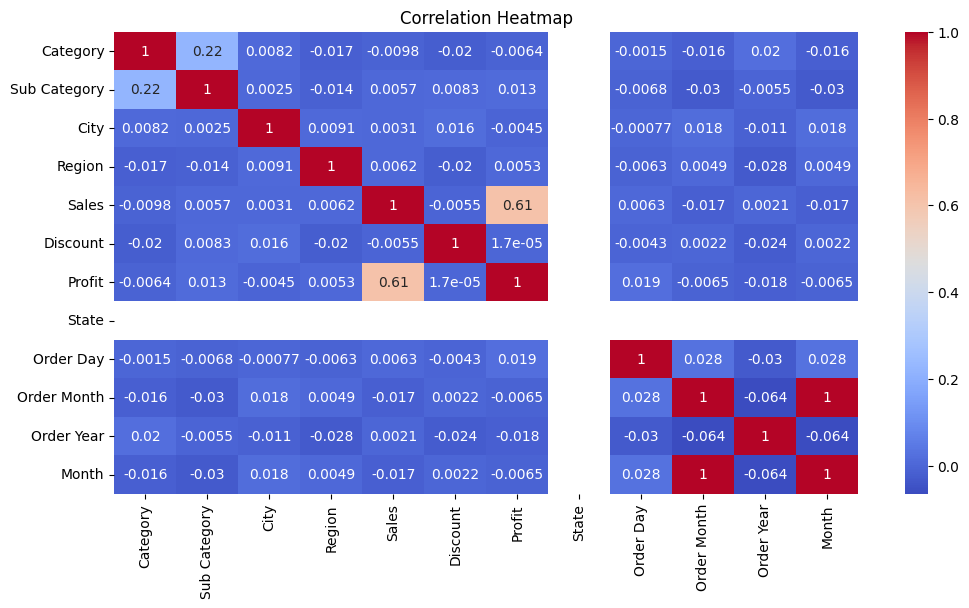

Mean Squared Error: 218090.05425370802
R-squared: 0.3387535682721161


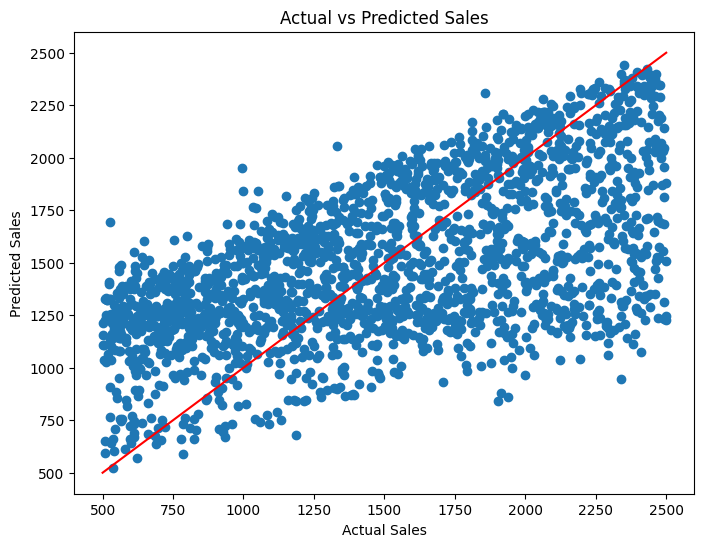

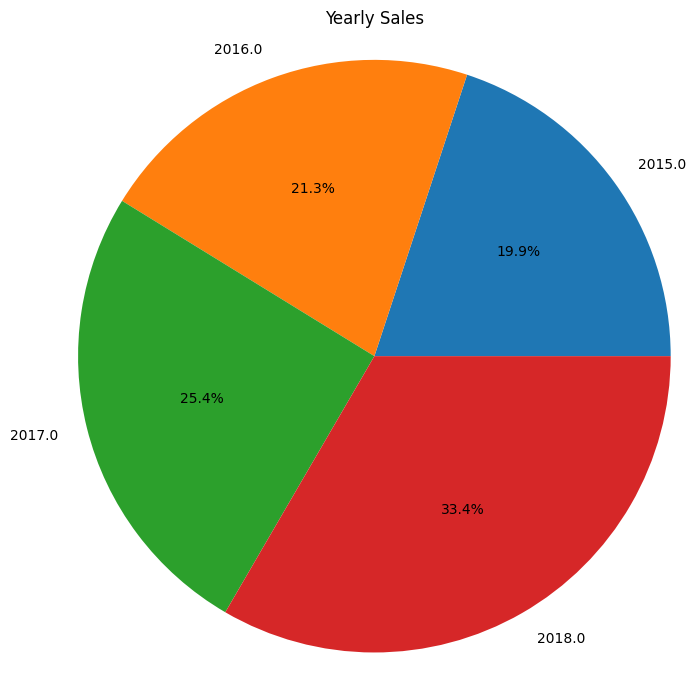

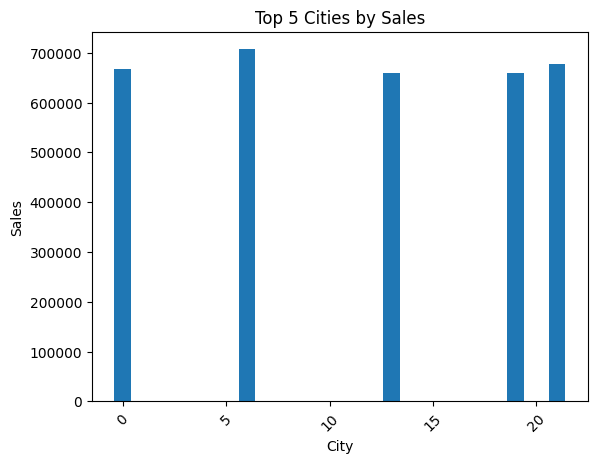

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



 # Load the dataset
data = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')
 # Display the first few rows of the dataset
print(data.head())

#Data Preprocessin
# Check for missing values
print(data.isnull().sum())
 # Drop any rows with missing values
data.dropna(inplace=True)
 # Check for duplicates
data.drop_duplicates(inplace=True)

#Convert Date Columns to DateTime Format
# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y', errors='coerce')

# Extract day, month, and year from 'Order Date'
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

# Label Encoding for Categorical Variables
# Initialize the label encoder
le = LabelEncoder()

# Add this before encoding, if not already present
data['Month'] = data['Order Date'].dt.month  

# Encode categorical variables
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])

 # Display the first few rows after encoding
print(data.head())

#Distribution of Sales by Category
import matplotlib.pyplot as plt
data.groupby('Category')['Sales'].sum().plot(kind='bar')
plt.title("Sales by Category")
plt.show()

# Sales Trends Over Time
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


#Correlation Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
numeric_data = data.select_dtypes(include='number')
corr_matrix = numeric_data.corr()


plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




# Select features and target variable
features = data.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales', 'Month'])
target = data['Sales']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 #Train a Linear Regression Model
# Initialize the model
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


 # Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test),
 max(y_test)],
 [min(y_test),
max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


#we want to find the Yearly Sales
 # we group by Year and get the total number of sales for each

import matplotlib.pyplot as plt

# Ensure your DataFrame has a 'year' column, if not already present
if 'year' not in data.columns:
    data['year'] = data['Order Date'].dt.year

# Aggregate yearly sales
Yearly_Sales = data.groupby('year')['Sales'].sum()

# # --- Matplotlib Pie Chart ---
# plt.figure(figsize=(7,7))
# plt.pie(
#     Yearly_Sales, 
#     labels=Yearly_Sales.index,
#     autopct='%1.1f%%', 
#     startangle=90,         # Starts pie at 12 o'clock for consistency
#     colors=plt.cm.Paired.colors  # Optional: color palette for distinct years
# )
# plt.title('Sales by Year')
# plt.axis('equal')  # Ensures the pie is a circle
# plt.tight_layout()
# plt.show()

# --- Pandas Built-in Pie Chart ---
Yearly_Sales.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    figsize=(7,7), 
    title='Yearly Sales'
)
plt.ylabel('')           # Removes y-label for cleaner appearance
plt.axis('equal')
plt.tight_layout()
plt.show()




 # Step 1: Extract relevant columns
city_sales = data[['City', 'Sales']]
 # Step 2: Calculate total sales per city
total_sales = city_sales.groupby('City').sum()
 # Step 3: Sort the cities by sales
sorted_cities = total_sales.sort_values(by='Sales',
ascending=False)
 # Step 4: Select the top 5 cities
top_cities = sorted_cities.head(5)
 # Step 5: Plot the bar chart
plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 5 Cities by Sales')
plt.xticks(rotation=45)
plt.show()
